In [ ]:
# Importing Library
import pandas as pd
import numpy as np
from sklearn import preprocessing
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
df=pd.read_csv("EMI_dataset.csv")
df

,candidate_id,country,organization,interest_rate,unpaid_principal_bal,loan_term,origination_date,first_payment_date,loan_to_value,number_of_borrowers,debt_to_income_ratio,borrower_credit_score,loan_purpose,insurance_percent,co-borrower_credit_score,insurance_type,E1,E2,E3,E4,E5,E6,E7,E8,E9,E10,E11,E12,E13
0,2.680000e+11,Z,"Turner, Baldwin and Rhodes",4.250,214000.0,360.0,01-03-2012,May-12,95.0,1.0,22.0,694.0,C86,30.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0
1,6.730000e+11,Y,"Swanson, Newton and Miller",4.875,144000.0,360.0,01-01-2012,Mar-12,72.0,1.0,44.0,697.0,B12,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0
2,7.430000e+11,Z,Thornton-Davis,3.250,366000.0,180.0,01-01-2012,Mar-12,49.0,1.0,33.0,780.0,B12,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
3,6.010000e+11,X,OTHER,4.750,135000.0,360.0,01-02-2012,Apr-12,46.0,2.0,44.0,633.0,B12,0.0,638.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,1.0,1.0
4,2.740000e+11,X,OTHER,4.750,124000.0,360.0,01-02-2012,Apr-12,80.0,1.0,43.0,681.0,C86,0.0,0.0,0.0,0.0,1.0,2.0,3.0,4.0,5.0,6.0,7.0,8.0,9.0,10.0,11.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19339,3.910000e+11,Y,Edwards-Hoffman,3.875,67000.0,180.0,01-01-2012,Mar-12,84.0,1.0,40.0,670.0,A23,6.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
19340,7.400000e+11,X,Browning-Hart,3.750,308000.0,240.0,01-01-2012,Mar-12,55.0,2.0,29.0,717.0,B12,0.0,774.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
19341,6.950000e+11,Y,Browning-Hart,3.875,377000.0,360.0,01-02-2012,Apr-12,68.0,2.0,17.0,799.0,A23,0.0,804.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
19342,5.330000e+11,Z,Nicholson Group,3.250,304000.0,180.0,01-01-2012,Mar-12,75.0,2.0,29.0,760.0,B12,0.0,767.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [ ]:
df.drop(['candidate_id','country','organization','origination_date','first_payment_date'],axis=1,inplace=True)
df

,interest_rate,unpaid_principal_bal,loan_term,loan_to_value,number_of_borrowers,debt_to_income_ratio,borrower_credit_score,loan_purpose,insurance_percent,co-borrower_credit_score,insurance_type,E1,E2,E3,E4,E5,E6,E7,E8,E9,E10,E11,E12,E13
0,4.250,214000.0,360.0,95.0,1.0,22.0,694.0,C86,30.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0
1,4.875,144000.0,360.0,72.0,1.0,44.0,697.0,B12,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0
2,3.250,366000.0,180.0,49.0,1.0,33.0,780.0,B12,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
3,4.750,135000.0,360.0,46.0,2.0,44.0,633.0,B12,0.0,638.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,1.0,1.0
4,4.750,124000.0,360.0,80.0,1.0,43.0,681.0,C86,0.0,0.0,0.0,0.0,1.0,2.0,3.0,4.0,5.0,6.0,7.0,8.0,9.0,10.0,11.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19339,3.875,67000.0,180.0,84.0,1.0,40.0,670.0,A23,6.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
19340,3.750,308000.0,240.0,55.0,2.0,29.0,717.0,B12,0.0,774.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
19341,3.875,377000.0,360.0,68.0,2.0,17.0,799.0,A23,0.0,804.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
19342,3.250,304000.0,180.0,75.0,2.0,29.0,760.0,B12,0.0,767.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [ ]:
df.drop(['loan_purpose'],axis=1,inplace=True)
df

,interest_rate,unpaid_principal_bal,loan_term,loan_to_value,number_of_borrowers,debt_to_income_ratio,borrower_credit_score,insurance_percent,co-borrower_credit_score,insurance_type,E1,E2,E3,E4,E5,E6,E7,E8,E9,E10,E11,E12,E13
0,4.250,214000.0,360.0,95.0,1.0,22.0,694.0,30.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0
1,4.875,144000.0,360.0,72.0,1.0,44.0,697.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0
2,3.250,366000.0,180.0,49.0,1.0,33.0,780.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
3,4.750,135000.0,360.0,46.0,2.0,44.0,633.0,0.0,638.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,1.0,1.0
4,4.750,124000.0,360.0,80.0,1.0,43.0,681.0,0.0,0.0,0.0,0.0,1.0,2.0,3.0,4.0,5.0,6.0,7.0,8.0,9.0,10.0,11.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19339,3.875,67000.0,180.0,84.0,1.0,40.0,670.0,6.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
19340,3.750,308000.0,240.0,55.0,2.0,29.0,717.0,0.0,774.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
19341,3.875,377000.0,360.0,68.0,2.0,17.0,799.0,0.0,804.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
19342,3.250,304000.0,180.0,75.0,2.0,29.0,760.0,0.0,767.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [ ]:
df.describe()

,interest_rate,unpaid_principal_bal,loan_term,loan_to_value,number_of_borrowers,debt_to_income_ratio,borrower_credit_score,insurance_percent,co-borrower_credit_score,insurance_type,E1,E2,E3,E4,E5,E6,E7,E8,E9,E10,E11,E12,E13
count,19343.00000,19343.000000,19343.000000,19343.000000,19343.000000,19343.000000,19343.000000,19343.000000,19343.000000,19343.000000,19343.000000,19343.000000,19343.000000,19343.000000,19343.000000,19343.000000,19343.000000,19343.000000,19343.000000,19343.000000,19343.000000,19343.000000,19343.000000
mean,3.87339,208278.602078,292.539213,67.342294,1.580158,30.957556,768.629478,2.806390,449.433077,0.002792,0.005066,0.004860,0.005015,0.007186,0.011374,0.012356,0.014941,0.018663,0.022954,0.026625,0.031019,0.038929,0.032880
std,0.46309,113861.346131,89.624827,17.340500,0.493546,9.710514,43.081873,8.124312,383.498678,0.052764,0.077943,0.081204,0.093340,0.117711,0.157121,0.184730,0.215312,0.247442,0.286155,0.329761,0.369823,0.418382,0.178327
min,2.37500,14000.000000,72.000000,6.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,3.50000,120000.000000,180.000000,57.000000,1.000000,24.000000,748.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,3.87500,185000.000000,360.000000,72.000000,2.000000,31.000000,781.000000,0.000000,734.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,4.12500,277000.000000,360.000000,80.000000,2.000000,39.000000,799.000000,0.000000,790.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,6.25000,718000.000000,360.000000,97.000000,2.000000,56.000000,834.000000,35.000000,832.000000,1.000000,3.000000,4.000000,5.000000,6.000000,7.000000,8.000000,9.000000,10.000000,11.000000,12.000000,13.000000,14.000000,1.000000


In [ ]:
df.isnull().sum()

interest_rate               1
unpaid_principal_bal        1
loan_term                   1
loan_to_value               1
number_of_borrowers         1
debt_to_income_ratio        1
borrower_credit_score       1
insurance_percent           1
co-borrower_credit_score    1
insurance_type              1
E1                          1
E2                          1
E3                          1
E4                          1
E5                          1
E6                          1
E7                          1
E8                          1
E9                          1
E10                         1
E11                         1
E12                         1
E13                         1
dtype: int64

Deleted The Last Row

In [ ]:
df.drop([19343],axis=0,inplace=True)
df

,interest_rate,unpaid_principal_bal,loan_term,loan_to_value,number_of_borrowers,debt_to_income_ratio,borrower_credit_score,insurance_percent,co-borrower_credit_score,insurance_type,E1,E2,E3,E4,E5,E6,E7,E8,E9,E10,E11,E12,E13
0,4.250,214000.0,360.0,95.0,1.0,22.0,694.0,30.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0
1,4.875,144000.0,360.0,72.0,1.0,44.0,697.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0
2,3.250,366000.0,180.0,49.0,1.0,33.0,780.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
3,4.750,135000.0,360.0,46.0,2.0,44.0,633.0,0.0,638.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,1.0,1.0
4,4.750,124000.0,360.0,80.0,1.0,43.0,681.0,0.0,0.0,0.0,0.0,1.0,2.0,3.0,4.0,5.0,6.0,7.0,8.0,9.0,10.0,11.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19338,4.375,104000.0,360.0,56.0,2.0,34.0,695.0,0.0,725.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
19339,3.875,67000.0,180.0,84.0,1.0,40.0,670.0,6.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
19340,3.750,308000.0,240.0,55.0,2.0,29.0,717.0,0.0,774.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
19341,3.875,377000.0,360.0,68.0,2.0,17.0,799.0,0.0,804.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


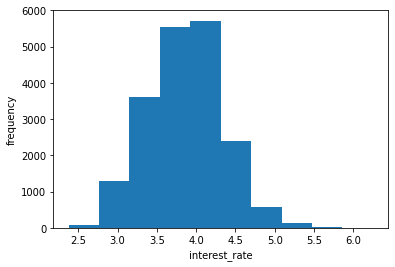

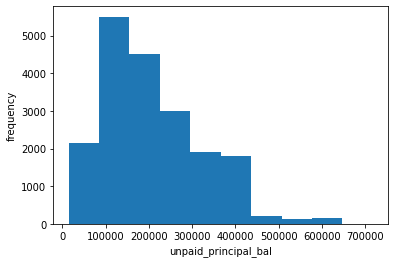

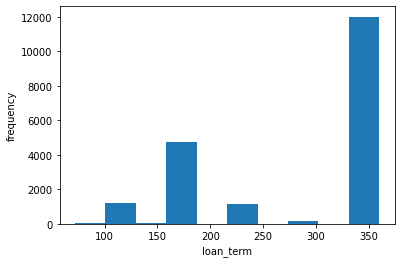

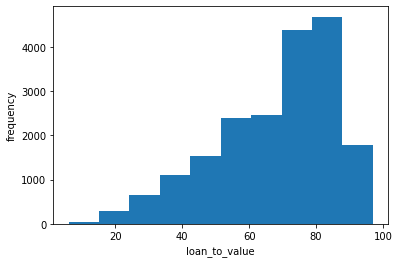

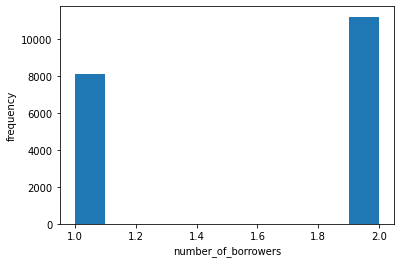

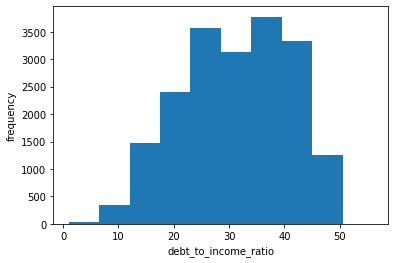

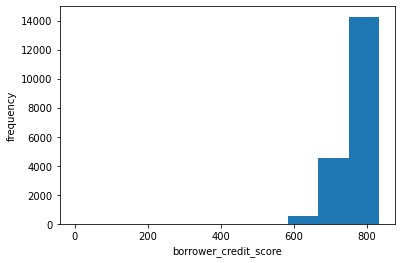

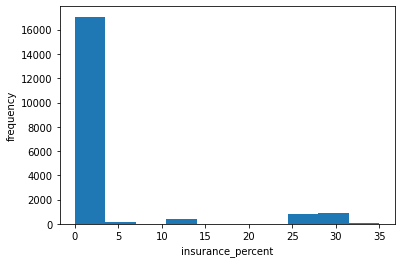

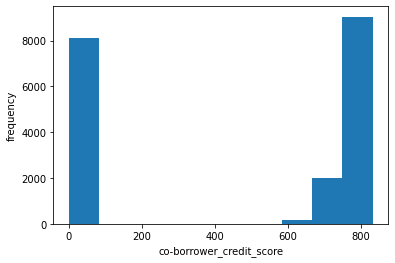

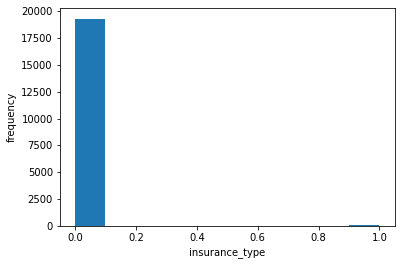

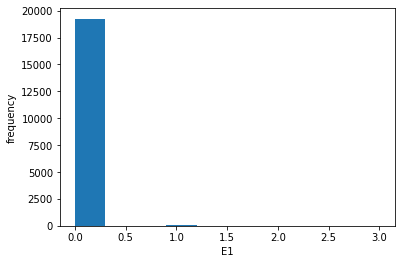

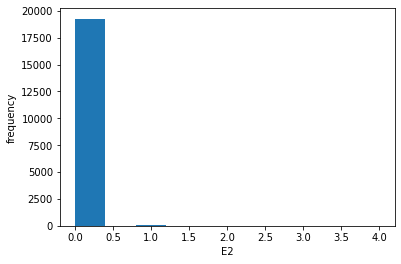

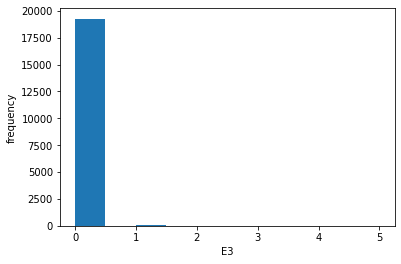

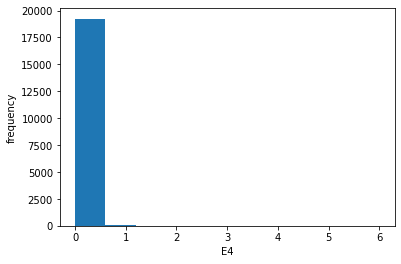

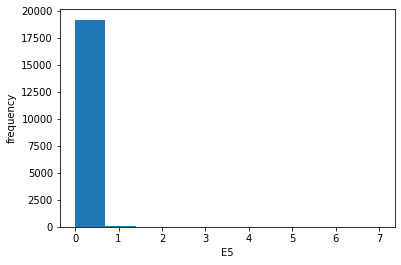

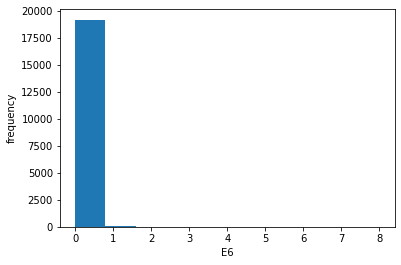

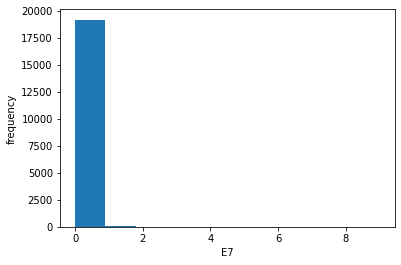

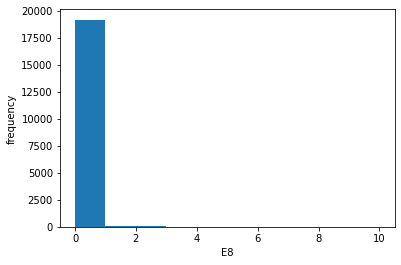

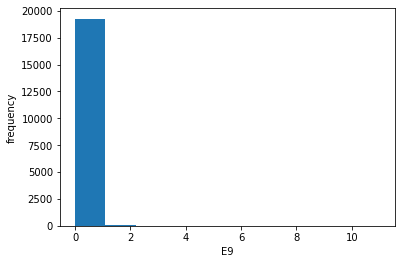

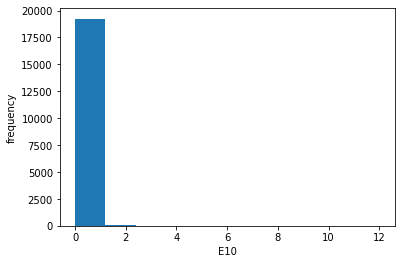

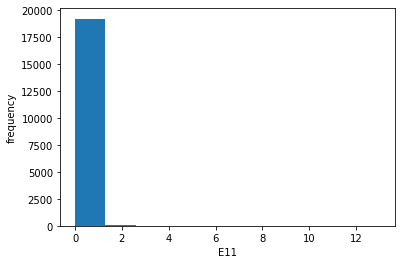

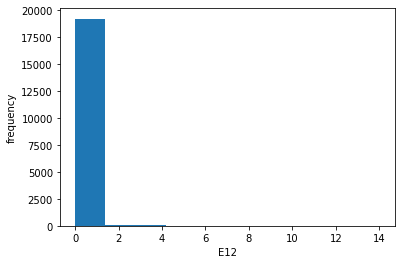

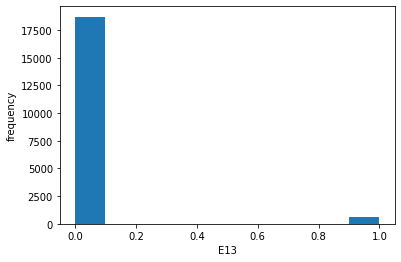

In [ ]:
for i in df.columns:
    plt.hist(df[i])
    plt.xlabel(i)
    plt.ylabel('frequency')
    plt.show()

SPLITTING OF DATA INTO TRAINING AND TEST SET WITH 70:30 ratio

In [ ]:
X = df.drop('E13',axis=1)
y = df['E13']

In [ ]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.30,random_state=1)

Logistic Regression

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score,confusion_matrix,recall_score,precision_score,f1_score 

In [ ]:
lr = LogisticRegression()
lr.fit(X_train,y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [ ]:
y_predict = lr.predict(X_test)

In [ ]:
print(accuracy_score(y_test,y_predict))

0.9670859900051697


KNN

In [ ]:
from sklearn.neighbors import KNeighborsClassifier

In [ ]:
knn = KNeighborsClassifier(n_neighbors=5) #Initialize the object
knn.fit(X_train,y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='uniform')

In [ ]:
knn_y_predict = knn.predict(X_test)

In [ ]:
print(accuracy_score(y_test,knn_y_predict))

0.9662243667068757


In [ ]:
print("Confusion matrix")
print(confusion_matrix(y_test,knn_y_predict))

Confusion matrix
[[5606    7]
 [ 189    1]]


In [ ]:
print("precision:",precision_score(y_test,knn_y_predict))
print("recall   :",recall_score(y_test,knn_y_predict))
print("f1 score :",f1_score(y_test,knn_y_predict))

precision: 0.125
recall   : 0.005263157894736842
f1 score : 0.010101010101010102


Naive Bayes

In [ ]:
from sklearn.naive_bayes import GaussianNB

In [ ]:
nb = GaussianNB() 
nb.fit(X_train,y_train)

GaussianNB(priors=None, var_smoothing=1e-09)

In [ ]:
nb_y_predict = nb.predict(X_test)

In [ ]:
print(accuracy_score(y_test,nb_y_predict))

0.9662243667068757


In [ ]:
print("Confusion matrix")
print(confusion_matrix(y_test,nb_y_predict))

Confusion matrix
[[5578   35]
 [ 161   29]]


In [ ]:
print("precision:",precision_score(y_test,nb_y_predict))
print("recall   :",recall_score(y_test,nb_y_predict))
print("f1 score :",f1_score(y_test,nb_y_predict))

precision: 0.453125
recall   : 0.15263157894736842
f1 score : 0.2283464566929134


Support Vector Machine

In [ ]:
from sklearn.svm import SVC

In [ ]:
svc = SVC() 
svc.fit(X_train,y_train) 

SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [ ]:
svc_y_predict = svc.predict(X_test) 

In [ ]:
print(accuracy_score(y_test,svc_y_predict))

0.9672583146648286


Decision Tree

In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import cross_val_score
from sklearn.metrics import accuracy_score,f1_score


tree_clf = DecisionTreeClassifier()
tree_clf.fit(X_train,y_train)
y_pred = tree_clf.predict(X_train)
print("Training Data Set Accuracy: ", accuracy_score(y_train,y_pred))
print("Training Data F1 Score ", f1_score(y_train,y_pred))

print("Validation Mean F1 Score: ",cross_val_score(tree_clf,X_train,y_train,cv=5,scoring='f1_macro').mean())
print("Validation Mean Accuracy: ",cross_val_score(tree_clf,X_train,y_train,cv=5,scoring='accuracy').mean())

Training Data Set Accuracy:  1.0
Training Data F1 Score  1.0
Validation Mean F1 Score:  0.7106307307106785
Validation Mean Accuracy:  0.9602658788774002


Random Forest

In [ ]:
from sklearn.ensemble import RandomForestClassifier

rf_clf = RandomForestClassifier(n_estimators=100,max_depth=3,min_samples_leaf = 10)
rf_clf.fit(X_train,y_train)
y_pred = rf_clf.predict(X_train)
print("Train F1 Score ", f1_score(y_train,y_pred))
print("Train Accuracy ", accuracy_score(y_train,y_pred))

print("Validation Mean F1 Score: ",cross_val_score(rf_clf,X_train,y_train,cv=5,scoring='f1_macro').mean())
print("Validation Mean Accuracy: ",cross_val_score(rf_clf,X_train,y_train,cv=5,scoring='accuracy').mean())

Train F1 Score  0.5500794912559619
Train Accuracy  0.9790989660265879
Validation Mean F1 Score:  0.7637841416188942
Validation Mean Accuracy:  0.9788035450516986
